In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from skimage.io import imread
from skimage.transform import resize
import seaborn as sns
import cv2

In [2]:
input_dir = "/Users/garvsawhney/Downloads/PlantVillage"
categories = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (128,128))
        data.append(img.flatten())
        labels.append(category_idx)

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/acb84d77-5b1c-4beb-be27-99fee467bf1f___RS_Early.B 7577.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Early.B 7942.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1994cd3e-4000-4c56-bede-d35a1eecc287___RS_Early.B 6867.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Early.B 7799.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1b4304a9-88c2-4c09-bfea-830fa162a35a___RS_Early.B 7188.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/86a65e8c-c7cf-45f7-8619-422eb6f1a40d___RS_Early.B 7745.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/60096f66-1bf2-4d8d-8137-ac2358ab71d0___RS_Early.B 6978.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/7ba072ea-9bb3-4b5e-8fff-82758ff3f722___RS_Early.B 8262.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ec9a34ed-90de-417e-bf87-31e748c8c770___RS_Early.B 7968.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0ddd62cd-a999-4d58-a8f1-506e1004a595___RS_Early.B 8041.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5a152fa7-7645-42ea-9c59-13258febe52f___RS_Early.B 7175.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e4b0f6ac-2b1e-4e10-8733-de421a01c390___RS_Early.B 8254.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d9a1cd5f-e2f2-49f7-b5f1-22cf02eb5ba4___RS_Early.B 8891.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/757b3cbf-a694-4e76-939c-5a93d3c932ab___RS_Early.B 8169.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/36548ca6-33b3-4a74-9b2a-52eba7aee9a3___RS_Early.B 9205.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/77c86eac-945e-4942-8eab-1269373d645a___RS_Early.B 7755.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c5c57ff6-cff1-4be6-a2fd-324efc139881___RS_Early.B 7450.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5755142f-0cba-45b7-a563-beb1bf6db374___RS_Early.B 8321.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b472654c-a32f-4c8f-b424-da6e415febf9___RS_Early.B 8930.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c18f83e1-2144-440f-9603-74fe58c66073___RS_Early.B 7844.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ed64bc0c-d2e5-44fd-a21a-f4d6b4f2f219___RS_Early.B 7366.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1896de06-b6eb-4c01-a6c6-3247405765b8___RS_Early.B 8335.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c777a0ce-5d2b-4e87-8cc4-d5f8847a4553___RS_Early.B 8239.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/da4c4f0f-ea7b-489a-8ac1-f8c63ff59bc4___RS_Early.B 8818.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/21d50c27-900e-4644-ab01-0cc96214d2f6___RS_Early.B 7153.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ee8df9d4-1893-49a4-b2e9-aee2b1e85ca0___RS_Early.B 6926.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/56a6692b-15ba-4097-aba1-ba428b6fefcd___RS_Early.B 7899.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d32f991e-d1da-44a3-b3e0-2f99cc038900___RS_Early.B 6994.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/41e155c4-eccf-4166-83cb-f110b2312c48___RS_Early.B 6985.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f3b29f09-c337-4233-8968-0fcc66c9fa2a___RS_Early.B 8115.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e912f95d-d159-47bc-b1ed-f0f08c3c391d___RS_Early.B 8366.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f8b3542b-559a-4aa4-9f4a-ec4d22f4386f___RS_Early.B 7309.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/92757a8e-b68a-45b3-9d70-0281c8ea90ca___RS_Early.B 7199.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/caef0735-6517-4194-b124-5916815e4a71___RS_Early.B 7956.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b6c68639-ad01-41f9-a10c-4233423ea2b0___RS_Early.B 8573.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/dc6516c4-a74c-465f-85a1-55608ee518da___RS_Early.B 8843.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/93992994-fcb0-4d3e-b528-e6fd9fd1b317___RS_Early.B 6686.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d03ee4f8-b77d-4f0f-8d13-d0a019a37a66___RS_Early.B 6970.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d998c614-017c-4f90-8e39-f8c500d21218___RS_Early.B 8292.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/49ecf1fe-0000-49e8-a042-fb6c9bac38c9___RS_Early.B 8940.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f6d8c094-970c-41c5-9f5d-3ded7c8f7b15___RS_Early.B 6846.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e7b48816-19f7-4dc2-bf52-dfbb85e1f59a___RS_Early.B 7240.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/51d521bb-5800-4f46-8fd0-f6cb09f37989___RS_Early.B 7572.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b83aea19-9485-412f-808d-c0a590d75388___RS_Early.B 6951.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a10b278a-fcce-4cf4-aada-254e89050be5___RS_Early.B 7524.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d44a363d-c186-416e-8fad-1a456699bba2___RS_Early.B 7229.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/3a97c74a-3d6e-4cd9-86e0-10a8e716e7b5___RS_Early.B 8422.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/fe2a7818-f2ec-4255-93f0-586c88a41624___RS_Early.B 7043.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f89d5362-f38f-4acf-8fca-2ea154c07cce___RS_Early.B 7018.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4bba904e-b4af-4a81-8252-b8d997bc5057___RS_Early.B 7695.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a601dd4d-4e81-4327-9e4e-fd19262a1306___RS_Early.B 8265.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c7f27f40-6634-4118-9990-6897e0c68579___RS_Early.B 7197.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ede5199d-4bf1-4bd0-a460-2168350ed05a___RS_Early.B 8773.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/db79941d-3ca1-42f1-b06e-d150a49d476a___RS_Early.B 8742.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a89d6e67-d60e-49b5-8b87-e137b6a5181c___RS_Early.B 7472.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/73cf20a6-b2c4-4302-a664-c43dccb78cfb___RS_Early.B 6930.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ee584747-fea1-4d16-9c03-40bfc9bcf1c7___RS_Early.B 8600.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c9bd759f-bd34-4333-a7b9-23ad810bba32___RS_Early.B 8033.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4d943ff8-e048-43c6-8861-4cdc6adab6a0___RS_Early.B 8726.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/2c0e712a-fb21-44b6-bbe1-7c67cec7b965___RS_Early.B 7084.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/dbee10d3-333b-4c62-aa90-23c1f859519c___RS_Early.B 7252.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/520475a1-5acf-433f-a306-cff6ec1a99ef___RS_Early.B 9159.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ca1bc7af-3220-4b45-b76d-8f950128c489___RS_Early.B 7266.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/334fd34b-f4aa-4cc2-9ac9-8b85df65b96c___RS_Early.B 6773.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/519e17be-a518-410a-ad3e-153d07fc3563___RS_Early.B 7711.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d91d88d1-89d4-4017-b0f0-9e875bedfcab___RS_Early.B 7201.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/72f7fa2c-974f-42af-99c3-fd4739d64050___RS_Early.B 8772.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a8933319-d98e-4e71-a2ac-e22f7e1bca08___RS_Early.B 7499.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/7584a5b8-b701-4255-9dde-a60b6442cc37___RS_Early.B 9154.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d829c0d8-016e-4337-b80f-bb1f329b1d4d___RS_Early.B 8797.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5c43b799-a722-4209-b571-2a7ca23de273___RS_Early.B 7321.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/70da76f2-b067-40f0-82d2-16b2dec3e189___RS_Early.B 8358.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5fbff81d-eeaf-430f-ba94-df6a92c7b8e2___RS_Early.B 6816.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f917c191-cca4-4a78-8238-a40b586f9058___RS_Early.B 7945.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e24cb505-5756-4269-aa4f-57d27da31b20___RS_Early.B 8973.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/2e88d4ed-b11b-4123-9e4b-f3c02a65ad39___RS_Early.B 9180.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1d4fc5d0-fee6-40bf-8e7b-e1598ea64161___RS_Early.B 8912.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/dc2775b9-e62e-4fe5-921f-e1cf5c4e2fe4___RS_Early.B 6942.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/6bd7d398-9cce-4282-a853-9625a641ebd6___RS_Early.B 8416.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/17520079-9d7b-481a-bc9e-676c5404d160___RS_Early.B 6774.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5deee0ba-6bbb-450e-a107-102063e2f93b___RS_Early.B 7429.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/29978e78-7d4a-4fff-a659-52e45e9b96b3___RS_Early.B 7672.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/3e7543bc-4792-4b65-afd9-f9ccd52b7319___RS_Early.B 8571.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/08cf1add-91f8-41ea-bc13-54e7d1cb6da0___RS_Early.B 6865.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8ce2ee77-109f-4a08-bee9-2877c2201056___RS_Early.B 6834.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/13ddd965-db42-4392-9798-fe0ba5ad7928___RS_Early.B 7631.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a4ac4e39-1342-4b1d-806a-98789876a701___RS_Early.B 8953.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/065fc68f-88c9-4fc3-b0a6-a6f5e1072eaa___RS_Early.B 7174.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/17667077-cf29-4976-9282-359c6da25cf6___RS_Early.B 6971.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/7d056cd3-76d1-49f5-8491-a25e4fc4f852___RS_Early.B 8414.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/61d53ca2-a8e2-4e5d-b8cd-3f9608b74fc1___RS_Early.B 6746.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8c3d0f9e-3a77-4ec2-a9ad-d996caa2c562___RS_Early.B 6887.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0a47f32c-1724-4c8d-bfe4-986cedd3587b___RS_Early.B 8001.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/53257270-67b3-4408-aaec-abbd9f5f19f0___RS_Early.B 7212.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d9b34eaa-9d54-41fe-9ea2-335fe0b572ee___RS_Early.B 7735.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/fb8d862d-29c3-41ab-888d-cef47286ee9a___RS_Early.B 8975.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1769d41b-fd4c-49b1-adce-e89fee6a352e___RS_Early.B 6741.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d286d101-227f-48ba-b906-586879eb6a00___RS_Early.B 7095.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c630212c-205f-469d-bb8d-9a143f65ab03___RS_Early.B 9000.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/60418916-8278-448a-af45-21ee8ef60a95___RS_Early.B 7957.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1f80f111-6a3e-4dfc-8456-0f3e9a19ae10___RS_Early.B 6879.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/7795f733-eeb0-4353-bdb8-b2f4d8d622d4___RS_Early.B 6960.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f48fc3b4-b7e7-4ad5-a651-0bf61a5173ff___RS_Early.B 8597.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c2cc82b8-9f74-4e40-9792-c121a89a84c0___RS_Early.B 8524.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/22d1678a-3abd-4fe6-ac13-b654e2589280___RS_Early.B 8523.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4e40c113-4ab2-4a71-9ecc-5ceb67905190___RS_Early.B 7446.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/cf761f3d-755a-42b2-83cb-729443246c6a___RS_Early.B 7319.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/3a8429cf-f8a7-4f64-a435-ec4f1ad692c7___RS_Early.B 8990.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/bcf169b0-dea7-49eb-b976-4a2d1f36c574___RS_Early.B 7870.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/36f84bc9-df52-44b6-b420-29c3881dea1e___RS_LB 4485.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d438f9b3-2952-425e-8c5f-a92a21b35f5f___RS_LB 4470.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/73366261-64f3-4219-a43a-97cda85474a9___RS_LB 3332.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9d0f96e2-93c7-4202-b1d1-6f878c066be7___RS_LB 3106.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4c846678-1c22-4734-b2bf-fb774bf3bb13___RS_LB 4090.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/57462a7c-a8f4-4b99-b312-a8b6e6a0e6f0___RS_LB 5330.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a9c8a264-33be-48f1-bd1d-2cc6c9c8e247___RS_LB 4888.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e2d4d58b-8754-4c63-b888-8355ddbcb989___RS_LB 4863.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a1523281-33d2-4cc4-910a-3d614a4cd085___RS_LB 2816.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2438dfce-68a1-4026-a006-4c99a0f6259b___RS_LB 5116.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/805f68c3-b0a9-4072-8ef6-4c48d804e888___RS_LB 5159.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/7f2933ec-8a70-453c-8e5f-4eb9d25eac6c___RS_LB 3917.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a34d3777-22c7-4723-8b85-f766e042c121___RS_LB 4375.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/60463ced-752c-4af3-9082-1de380c572e4___RS_LB 2580.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a2b27b82-4459-4dcb-a065-92a75f3c9c4b___RS_LB 5018.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/3171caea-9708-45dc-a60b-e347b3e74fb8___RS_LB 5256.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/890ffd2b-7365-4a91-b0e1-f414da0a17a4___RS_LB 3216.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2565077d-44d3-4213-82c2-bf5ae9a64368___RS_LB 3295.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2d8cbe58-280e-4c93-9b06-26f4279eb4d8___RS_LB 2855.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f3ee2886-4ada-4287-94b6-c4c93005b887___RS_LB 4352.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/fd81a3e2-1d3e-4e52-a010-ad1b36a5220d___RS_LB 4067.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f083d357-23f8-45e6-9fac-87e5d0ab9cac___RS_LB 3317.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5a7127de-28ef-47fb-ba00-4b68bf0d4157___RS_LB 2822.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/49ffd4fb-07ef-4377-9f14-3648deaa8dd2___RS_LB 4453.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/3

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/acd7a42b-15eb-40e4-823c-49eff6b4e95e___RS_LB 4636.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c7adbae8-04db-489d-b9e6-c12de387d25c___RS_LB 2697.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f62c0408-af09-4883-a780-7bd335e60443___RS_LB 5258.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5239c829-457f-4e6c-b0af-ef5f58abddd0___RS_LB 5329.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9a179173-fbfb-4e92-9959-58b826625c9b___RS_LB 4761.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/20880dc9-069c-40e5-81be-6d6e33f9519c___RS_LB 4098.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2e2bc24d-9900-4b0b-a8ec-abb444350c03___RS_LB 4701.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/84559c6d-0589-4d8d-8fc3-a818b067f85c___RS_LB 4608.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f87fce12-78df-4a8c-92ff-8c0b83cc82b9___RS_LB 3025.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ce5ec29b-599c-4c69-ba4d-04df7ab1c46f___RS_LB 4945.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/01a8cc9f-074a-4866-87c8-bb5a9e3895b4___RS_LB 2968.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/7b32b8b9-6b65-44e6-a3e5-edd7a5d62ec4___RS_LB 4142.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5318452f-222d-4abc-b39c-55fa6c26a82a___RS_LB 3063.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/542c1489-0040-4867-acb3-82f73249e2f8___RS_LB 4592.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/bd632f59-ff1c-452f-b504-053fa95ab000___RS_LB 4356.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/58f100f0-490b-4868-95d1-5883fc3432d3___RS_LB 3302.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a4534f9b-87ca-4ce0-a6f8-84f94544ef37___RS_LB 2775.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d94eae91-7d2e-4394-b892-8c8c7fa9cf11___RS_LB 4864.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/65bab626-51a1-4d16-ab9c-ddd25f4e2e33___RS_LB 4927.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f8d2bf55-3044-4d09-9372-63aa960f1881___RS_LB 2538.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/030e8945-d3ce-4ad3-8a91-a14c18285249___RS_LB 2532.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ad2396a9-306e-4ca9-88dc-56b2bde77c6b___RS_LB 2755.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6d31cafb-4cf9-455b-ac89-487444b650f7___RS_LB 4236.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6d22d4ab-de5f-4944-96f9-4ec495a8e4f1___RS_LB 3109.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4d213f48-e73a-45bf-badd-ead51dda60b4___RS_LB 2981.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/dd9b9122-fd29-4986-9dc3-330d4a48ccc3___RS_LB 5290.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/48f93953-2de7-4724-9c7b-69dc13a47759___RS_LB 4977.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/468629f7-6ca2-4823-9a39-d42b4d92c4bb___RS_LB 5312.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/fe4bbe61-ddd7-464f-8aa6-e292b8686c70___RS_LB 2902.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6be49d30-1b69-435a-a533-21b2b1a7fd41___RS_LB 3309.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/625cf166-4cb5-4e6f-ac94-1193698388f2___RS_LB 5427.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/37075adc-dd51-4a5b-8a6c-0649cb98516b___RS_LB 2678.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c0e1bf8b-8b3d-4e00-bbd7-dc134dd9ca42___RS_LB 3234.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/969aa93b-46d1-478c-a398-dcb4ed7d27bd___RS_LB 2870.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c4c1c25f-0594-4c81-a1e0-a609ee1f0808___RS_LB 2653.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/09a215a1-a539-4635-a27f-232229ff11f4___RS_LB 4529.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c8bfd67e-892e-4502-982a-adba5505be5d___RS_LB 4444.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c16b698a-77b9-48f7-943a-457d475242ef___RS_LB 2918.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/bb81b8a0-3d1e-4cef-aeb5-31ac32f1761a___RS_LB 5268.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/891ddb02-a289-4d8e-8380-7568686b7a08___RS_LB 3193.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d3cbf715-a2a3-4024-ac5d-c6ae21a77720___RS_LB 2735.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/990428a4-bfa8-450d-a755-fade1df0a214___RS_LB 4082.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2846161c-9ac0-4ef3-b563-aee344dac80d___RS_LB 4851.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/36fc1631-634b-42d3-a865-cc858557a8a8___RS_LB 4427.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/bd70c718-5846-42a1-8b05-22792ec98738___RS_LB 4992.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/81e4675f-5f16-4c8a-be12-acb79f46575e___RS_LB 3111.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/33fa45a7-e6ff-4e75-9c6e-28570fdfedb6___RS_LB 3054.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d78c58b2-c9d1-43f2-8b18-4455855c0f1f___RS_LB 3288.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ab9b15fb-d4cc-4d67-a5bb-8b88f066c1db___RS_LB 4825.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9a7d732b-12e2-400f-9206-068df63de1ba___RS_LB 2926.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/29dafc9e-eb0f-4f3b-99ab-a617b8163e50___RS_LB 3052.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1c6ec55e-182e-4b7c-b416-07029edfc970___RS_LB 3950.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/aaf6fed2-0c7d-47b5-99df-bb6950092fe5___RS_LB 2723.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5d85a25d-ed5a-459d-89fc-8bc9118518bc___RS_LB 4646.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/17d846d2-f2b7-4ba2-847c-7561159334a3___RS_LB 2695.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e28b4ead-09f5-4e34-a162-0e0268f53763___RS_LB 2583.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/84f666da-9e17-4e90-9813-0ed64da175d9___RS_LB 2536.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f14f54ba-3706-4f6e-8152-01226e55c86e___RS_LB 4237.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9e1dc573-9cc5-4bc1-9c95-63c7bfba54f1___RS_LB 2976.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ef49abc4-4b8e-4438-88a9-b3acfdb52014___RS_LB 2623.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e9429874-1098-43af-bc38-0acc0b93f4f9___RS_LB 2682.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/eb34280e-0cfb-4166-a9b8-a15892c9ff5c___RS_LB 4450.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/910139a3-cd42-4adc-a24b-3602fd4de7d3___RS_LB 4415.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e6d7f5aa-d176-4e43-9e0c-afc2901442f6___RS_LB 3066.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4afd8bf6-0e1e-4a85-a576-1e8995c88d5c___RS_LB 2505.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2482a11a-46b1-4e06-9b5c-4af0089b3259___RS_LB 4087.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/90302aa5-644e-4857-b60f-92f6aed488fa___RS_LB 3246.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/856b9ab9-c5af-43f1-a320-097b7380d314___RS_LB 2789.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9e979a65-61bf-4d07-a444-7c22ae1a58b1___RS_LB 4886.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/3112e625-f1d9-428b-a77e-23c6f28e44f8___RS_LB 3035.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/87c99be5-a930-410f-8529-e79e030cba0c___RS_LB 5294.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/580e8c49-3b1c-46d2-b3f4-68f0b3de0d77___RS_LB 4063.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6f0fffdc-876f-449f-b03e-f25081f2c44f___RS_LB 4096.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c6d1bbe7-c1d8-4760-9bb2-a97eac1ca0a8___RS_LB 3838.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d80e59e3-a88d-4c32-8dd1-a23a6fed45ae___RS_LB 2846.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/954d36cb-4a20-4889-83dd-4cba7e7180f8___RS_LB 4536.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/8e864e28-d161-4888-bf90-fd9467bfe9c2___RS_LB 4574.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ebd47dca-590b-43c4-812d-32f95b776690___RS_LB 3834.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/33b849d5-ec92-4acb-88e6-530accf22734___RS_LB 4994.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e

/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/7948ada9-eabc-4cb7-a579-b73e938eb716___RS_HL 4185.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/f0fdde26-78b4-46f0-9eb8-7c2a743d34aa___RS_HL 4165.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/f30983c0-6e20-43cc-8672-4622ca34c830___RS_HL 1949.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/415ac4a2-8f16-4052-880e-1e1f208965f0___RS_HL 1884.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/774875d3-438a-4305-afe2-7d59e2925dc4___RS_HL 1759.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/9d7d1bb9-1b10-4a8f-a961-e404b9d5acf8___RS_HL 1960.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/a3ec91aa-8503-4711-a912-0d1427e25686_

/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/dca8ac5c-b925-435a-a5e9-da09fa8938a1___RS_HL 4182.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/b0fe9fe9-52e7-40e4-b4c0-769f1a0c7fb9___RS_HL 4175.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/71c06efe-089f-49b3-beed-095bd7640e32___RS_HL 1947.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/b4031970-60ea-4739-9fed-6c81be1bad1c___RS_HL 1752.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/de9a8669-d437-40f0-aa56-fe2d8276a1e0___RS_HL 1910.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/7e6c8297-dfe1-4826-826e-01d696cc263b___RS_HL 1863.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/36bdc44c-96a4-40bb-86f7-63a91d706e96___RS_HL 4203.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/46b2555a-c0a6-48c2-af13-0816e147e4de___RS_HL 1943.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/d287be3d-cac6-4485-8c31-674fb8b459be_

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a278a40a-bb25-4210-b646-2d232245851a___RS_Erly.B 7719.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3754ec0a-13b7-40c5-9839-b7499b6c365b___RS_Erly.B 7449.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/8f6562ec-69b1-4d97-85be-844034c98c4d___RS_Erly.B 7569.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/32ae9564-c205-4814-b579-1ebf0d732e7e___RS_Erly.B 9415.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3b3193c5-e717-4b40-b450-7ee5c6e22d1a___RS_Erly.B 9382.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0fc8cb27-a10f-4587-a91d-4dbec9f839c7___RS_Erly.B 7715.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c9fa82b3-776c-4a44-8309-a6faf88898e3___RS_Erly.B 7498.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/b7294a44-e1fd-4eab-97ac-ed6669c58d8f___RS_Erly.B 7514.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1ba88993-c3f8-462d-bd1b-e10819b9c96f___RS_Erly.B 8396.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0cd1ebaf-3975-4749-b625-50b7b0751c36___RS_Erly.B 7508.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c63ff9c7-0422-4a71-8727-7c2581fdee6e___RS_Erly.B 9406.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3e9af11d-b43d-4bfd-9cdf-1b0d847d3bf6___RS_Erly.B 7739.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/29e36e1e-0857-4985-8d33-505290dff591___RS_Erly.B 6343.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1c9e0f1a-7314-449c-9482-9059684ac82d___RS_Erly.B 7840.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/22b653c4-9e15-4081-8ece-9b5950a94120___RS_Erly.B 7814.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/abb2b25f-a1a8-49c7-8bc9-a66dc224481d___RS_Erly.B 9573.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1829d517-53ae-48a9-b721-5043dd10d0d2___RS_Erly.B 9518.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3d8e1f90-be34-4da7-b124-a98eddb346d1___RS_Erly.B 7414.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/48dd3efc-400d-4b81-a569-13a51083df58___RS_Erly.B 7718.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0efaac13-1988-48db-aec3-f31df3045b95___RS_Erly.B 8342.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/65590648-dcda-4455-b1ca-9311e4e6d0af___RS_Erly.B 7659.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/e803b217-d9a9-4b0d-9ea1-679145625159___RS_Erly.B 9571.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a007bf16-ab14-4d3c-99b1-0710882cbb17___RS_Erly.B 9388.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/52082b15-4350-415a-be8c-bb0e0fc3ab88___RS_Erly.B 6332.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2b7c8b0d-d906-4c93-9dc4-554ae46a3ec3___RS_Erly.B 7825.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1d1d79c6-824d-4c48-bd59-c83a5cf29229___RS_Erly.B 9547.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/87b9735b-4018-4b28-b0b3-422a184a6716___RS_Erly.B 7509.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5bd6338a-0f10-457b-a7bd-69f2ee7c6504___RS_Erly.B 9534.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/bb12ec71-c438-43f5-a077-e5924af2409e___RS_Erly.B 8402.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/b4d37218-1f10-4232-8eeb-dd4106f0f1af___RS_Erly.B 7702.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/eabc47ee-5023-476b-9992-53baa566d270___RS_Erly.B 7757.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/aca65de6-6464-4f8c-803d-b55f92f950f8___RS_Erly.B 6663.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/e6645f63-afc8-416a-a4cb-0f5c719476ae___RS_Erly.B 6419.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0bb52721-51a6-4343-8c54-de15cedf8e5c___RS_Erly.B 7572.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/31e2b9eb-6005-493f-b1c7-293f3dd309dc___RS_Erly.B 7859.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/6f8046e5-2fc8-4243-a887-b4e99d16397d___RS_Erly.B 6471.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2840c2f1-b901-41c2-8d0c-7827bc7f8ab3___RS_Erly.B 9574.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/34044338-c693-4604-8764-35eaece11e56___RS_Erly.B 9483.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4c5f5a51-0ea2-477b-a0bf-e0d511f53e87___RS_Erly.B 6397.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5595a78c-8a56-4ee2-b085-a96c6fb67846___RS_Erly.B 7716.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2f823081-0654-47f1-bb1e-88d7e99a94ca___RS_Erly.B 9542.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a8d430c0-7dff-4474-a6c1-1fd601198ff6___RS_Erly.B 7738.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/61f57acc-088f-45e0-b0b5-860120082ae9___RS_Erly.B 7388.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/fbc07887-0306-4f85-9de9-ebb68a87753a___RS_Erly.B 7456.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/fae08468-fe96-4604-9b86-bfe4c4f06999___RS_Erly.B 9530.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a138ec63-9d5e-4c6d-97d6-da0159c93c0a___RS_Erly.B 7744.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/070679a9-27e1-4e6e-8072-29f3750d525b___RS_Erly.B 6439.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7b7780c0-f1b2-4095-924c-f3d7777b427e___RS_Erly.B 9613.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/be847eed-94b5-4f0e-9b34-68cc842565a2___RS_Erly.B 7831.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/59dbd132-6e6c-4127-a218-b7602cbee670___RS_Erly.B 9449.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/eb2537b2-d6fa-4c70-b919-f90bbe2c65f2___RS_Erly.B 7605.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/29fb6588-a368-4143-9cdd-8a131f0d50f4___RS_Erly.B 7779.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3b86d42f-4b22-4bfe-bfa9-ec4567c886dc___RS_Erly.B 7823.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4283992b-ab8a-41aa-baeb-17a5b0f75af1___RS_Erly.B 7621.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/07409e2c-a730-4b11-b25e-31025bd63a91___RS_Erly.B 9578.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ee7a6de8-1aca-4a55-8c12-69be6277c1c1___RS_Erly.B 9591.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/30546f58-8d3a-4318-87d1-322427a12380___RS_Erly.B 7404.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/bac5677d-59b4-4183-839f-24860287ed6a___RS_Erly.B 9503.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/e20fb98a-26f9-43a1-8d55-e1daa9b6a455___RS_Erly.B 7351.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/752de1b6-d4be-4741-9812-3681c6bd4b40___RS_Erly.B 8308.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a98a655f-a2f5-44eb-a73b-edf25ca85921___RS_Erly.B 6351.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/957be08a-9b4f-4c28-9908-622fdb996f1c___RS_Erly.B 7591.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ca7035fa-f55d-49c7-9d89-3d513c8e35b1___RS_Erly.B 7556.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4d007f46-814a-4cec-93d4-0be4b32a9ed6___RS_Erly.B 6495.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7c1dc810-54ee-4442-86d5-6994d4736d92___RS_Erly.B 6430.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/f59545f4-cded-405a-bf6f-f4b77e51e2ff___RS_Erly.B 7737.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/06d0298e-18e5-4bf5-8d33-8feef6600f15___RS_Erly.B 7573.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/cef9fa90-aca2-4354-b79e-2486409ac685___RS_Erly.B 7563.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ee083b4e-3abc-4d9a-8395-de6c8ee27331___RS_Erly.B 9525.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/08615b7d-eca7-487e-a9ea-07842ecf81e8___RS_Erly.B 7543.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/072ae43a-416b-434a-a5a2-1b48bc47fada___RS_Erly.B 7472.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/da3ad71b-85ba-4e94-bd12-8eff52776138___RS_Erly.B 9469.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0f1fb081-c715-414e-aa64-2c398ba6c320___RS_Erly.B 6382.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a8cade96-090a-4dcd-bc79-d13a4046370d___RS_Erly.B 7721.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/074bc781-f586-46b0-bef5-0237e3bf5043___RS_Erly.B 8375.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/bdf7f885-1619-4b3f-bba8-e97896af0de5___RS_Erly.B 7819.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4e24576f-00c2-494f-b47b-b2b3885b4749___RS_Erly.B 8279.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/6e673a0a-ad79-489d-bd0a-d96479fd81b5___RS_Erly.B 7441.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/bec8a4aa-dd9c-44db-815a-c760d49a8868___RS_Erly.B 7680.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/05fab431-cc13-4d6d-b4e1-912e0059c7c1___RS_Erly.B 8349.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1c29bc72-967e-46df-844b-467c95b298a3___RS_Erly.B 9549.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5592a349-b19a-4fe8-a131-a89bbae8b655___RS_Erly.B 7474.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7b962f23-1e0e-4c28-b741-d21c51ab6d4b___RS_Erly.B 7835.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/b24f8f98-4bfe-4605-85f5-738fc09e58fe___RS_Erly.B 6406.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/b81b4276-e0c9-460a-ab94-79b6a5d0f2d6___RS_Erly.B 7538.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2f3c483a-b18d-4571-8c00-fb24f166d328___RS_Erly.B 7667.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1e671658-3463-4a38-8b6a-e2867aeeda10___RS_Erly.B 6359.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ee18e688-a12c-45aa-bd18-74df670c71bb___RS_Erly.B 7776.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/70d0d259-85a6-4be5-8d47-dba059c5c259___RS_Erly.B 7539.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/e31c2f10-8b8d-4aec-9bc7-764d2995ebec___RS_Erly.B 7398.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5fdc3c4f-b88a-4aef-8a56-87336f220ff4___RS_Erly.B 6376.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/11922494-321b-4742-afbe-f6db6a8b4005___RS_Erly.B 9392.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ef7a2893-ca76-4f77-beb4-5bfcc729e324___RS_Erly.B 7454.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/38b7f839-7d01-4062-a858-a64b841b7996___RS_Erly.B 7390.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5d45c117-439e-454a-bc77-93a27ce98761___RS_Erly.B 7546.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2586a260-ecf6-40e8-aa11-4b8a50845575___RS_Erly.B 7833.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/f7065117-14b1-44f1-b9ec-953b61fd3368___RS_Erly.B 9544.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/e56354a5-5e3f-4ed6-bfe5-3c783a32dc98___RS_Erly.B 9413.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/61047d59-d93a-4133-92ab-4f2481fa6bed___RS_Erly.B 9533.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/24455ffa-8700-475c-8b4e-a7775f40ad3f___RS_Erly.B 8365.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c43cc003-56f4-4d9d-b224-6948f499cf95___RS_Erly.B 7675.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/872ec950-8238-4f73-a366-f72f2f92d3fe___RS_Erly.B 7487.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/268590f4-68f6-4de9-968e-a7465b377db4___RS_Erly.B 7614.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b2b78605-d686-49ad-b312-ff96c1d7acf1___RS_Late.B 6177.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b19055d9-6a5d-4b73-90a5-3b3685ac344a___GHLB2 Leaf 8729.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1c5deb80-6bde-4aa4-843e-c69f80b7713a___RS_Late.B 6874.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/75c6ecf4-8a75-4bc6-bfcb-2331f5c56b38___GHLB_PS Leaf 24.1 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5acc6d4e-6ca5-4a1b-b0bd-7678c6c280f9___GHLB2 Leaf 8709.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b883a992-1177-473a-8c0e-c08ebf9ac743___RS_Late.B 5537.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/37621a3b-a1df-4052-bd30-40ac0f04252a___GHLB2 Leaf 149.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9cb4cbdd-147f-4cfe-a30a-dd003520f0dc___GHLB2 Leaf 8988.JPG
/Users/garvsawhney/Downloads/Plan

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3a7b4305-431f-431b-809f-79ae28306b41___GHLB2 Leaf 8965.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/359ad718-024d-4c9e-b871-4144ca25da76___GHLB_PS Leaf 23.1 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/27dd7c54-809f-445e-97a5-ba0792d4592b___RS_Late.B 6371.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/be2cc67b-7311-47a4-bcf7-bf62bf429533___GHLB2 Leaf 9008.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2d63d91d-5366-4f88-83e1-cc5ce4b16d2e___GHLB2 Leaf 156.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f385d5e4-5dff-4851-a806-95a608d04b17___GHLB2 Leaf 132.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d75573fb-2bd8-43fa-9af5-3f219e35142f___RS_Late.B 5070.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a03417ff-445e-429e-aa3e-d90c23886f6e___RS_Late.B 6356.JPG
/Users/garvsawhney/Downloads/Pla

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/24c41335-1ad7-4b68-9756-577ed8cf3525___GHLB2 Leaf 144.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a7cee503-4a3e-42dc-963c-2ae166064f6a___RS_Late.B 5602.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f5aebbf7-df07-4682-8d3b-3dd46e2e36c4___GHLB2 Leaf 9092.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6bb72ae0-dc39-4098-bc4e-e09044990c5c___RS_Late.B 4868.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4505676e-d70e-460e-bac1-ce20d94f3944___GHLB2 Leaf 158.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0c9ff8e1-b610-43e3-b914-5e9576dd8083___GHLB2 Leaf 107.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4d9faab5-238d-42a1-ae87-5e3d0a38a3e2___RS_Late.B 5033.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8634f13d-ee5a-442e-8b58-6b667c91379c___GHLB2 Leaf 8968.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5e7a999e-6617-4c94-8c57-c1b0e1a392b9___RS_Late.B 5636.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cc822a81-2140-421a-957c-e4ccfa2c0ba5___RS_Late.B 5357.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2dab6657-8b94-41ea-b610-74895532efe0___RS_Late.B 5567.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/01ece5a1-8398-4e68-a9e3-198c57b51b01___GHLB2 Leaf 8757.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b62c8328-7089-4b43-b77e-20511356d04b___RS_Late.B 5490.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/41c1d7a7-5d90-4b0a-bd41-565393d422c5___GHLB2 Leaf 108.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1627cb48-dc80-46a1-bda0-b677c32fbf56___RS_Late.B 5066.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e7aaf85a-7392-43b1-9b10-6f1fb0045cba___GHLB2 Leaf 8961.JPG
/Users/garvsawhney/Downloads/PlantVillage/To

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/66f03c1a-6810-41b2-93cb-ccc1630a18d4___RS_Late.B 4882.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c4e95382-4bc7-4271-89ba-889f1dc55a2b___GHLB2 Leaf 9093.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c933f19c-7b00-4dca-b2c4-94d3b9212f92___GHLB2 Leaf 8985.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0ac3df5b-d713-42ef-b0ad-20b5410237ad___RS_Late.B 4969.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7e77fde0-ab1b-4256-be51-0f6eecf85007___RS_Late.B 6995.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/01425d17-4c97-46e3-b395-c1453b78ab78___GHLB2 Leaf 9100.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/037c55c7-6e33-4b8d-af05-4d555f4e658e___GHLB_PS Leaf 42.1 Day 18.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ea9e87df-efa8-4be3-8181-59a4b24dc3b7___RS_Late.B 6279.JPG
/Users/garvsawhney/Downloads/PlantV

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/240b17f3-2b2b-4ff4-add7-4ba2975f4837___RS_Late.B 5130.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0334d40b-d880-442f-a7db-e5c85a2e0bed___RS_Late.B 6367.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/288f203e-7996-4290-afa7-f95c0c30506a___RS_Late.B 5562.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8db4bafa-489e-42ff-ad14-98cb9af8e733___RS_Late.B 5397.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e55af4aa-1f1c-4300-86ca-bdcff04bef80___GHLB_PS Leaf 2 Day 9.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1ac4f6ea-d2d0-4b94-93f0-788a5e92fe90___GHLB2 Leaf 8707.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/63dfc6c7-3521-4a3d-a279-7ec8065e8e71___RS_Late.B 5400.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ac1fbb8a-2a44-4d70-8c93-fc3cc13a876d___GHLB_PS Leaf 17 Day 8.jpg
/Users/garvsawhney/Downloads/Plant

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b96efa85-1d48-4a5e-9c80-4b1848182c93___RS_Late.B 6961.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4de5d2c4-bed5-436a-95e2-bcf43a1723fd___GHLB2 Leaf 8727.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3ef1e6d9-0ea8-4b1d-a2f4-a99bbc4ba66e___GHLB2 Leaf 8830.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7efeb8b7-9416-4b2b-bf24-acaf62918008___GHLB2 Leaf 124.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4780f75c-a79a-47e6-89a0-7ecb5d18876e___RS_Late.B 5499.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2f6eb969-db8b-48ae-954d-f716a61fce22___RS_Late.B 6555.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/dfed006d-7f5e-4a06-a73b-dc6cc837b59a___GHLB2 Leaf 8793.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9afc2537-1b13-4c25-b5ed-5b8de511b0ab___GHLB2 Leaf 9033.JPG
/Users/garvsawhney/Downloads/PlantVillage/

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ec3d3481-5b97-446c-a1e7-c97334166a50___RS_Late.B 7029.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6f52294c-e947-4fdc-b818-60b1d47beb06___RS_Late.B 6231.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/12044cb0-2591-4696-8a85-3d3f319f4f6a___GHLB2 Leaf 8977.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8f268f79-0230-4dfb-a7e9-e68bb506798e___GHLB2 Leaf 8739.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/39c5ef21-730a-4e51-9eb0-a7639295c116___RS_Late.B 5157.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/81cb76c4-86f6-4af3-a11a-ad827fff857c___RS_Late.B 5074.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/bb29cc81-e986-4946-8267-a12f0b1b15de___RS_Late.B 5000.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a02557d9-976b-4b21-8318-aecef263f90c___GHLB2 Leaf 8649.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tom

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7f8ff945-6a8a-470b-aa5f-0b3f5ce87c01___GHLB Leaf 1.2 Day 13.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c1af9374-2c73-4af4-a139-7b636467743f___RS_Late.B 5592.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/083bd43d-7dcb-4f3c-a0ca-6de1f468c9ef___RS_Late.B 5173.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/bd38d701-9972-4472-852c-b4e27f6d72e2___RS_Late.B 6581.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1745208a-82b2-4a82-9791-d812cb016850___GHLB2 Leaf 95.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c8e70ac1-1fbc-496d-a6eb-954ef48d4f56___RS_Late.B 4932.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c2206073-244f-49ca-afe8-4455d00133b9___RS_Late.B 6805.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e798b45b-9267-4cc7-a459-808f9944fd49___RS_Late.B 5003.JPG
/Users/garvsawhney/Downloads/PlantVillage/T

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/100a5029-a6c0-4a07-a40a-f27d6d44cdc9___GHLB2 Leaf 9002.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b88f6060-ca8b-4c4d-bd4c-1ec1ae186b71___GHLB2 Leaf 8711.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/545d8b80-b6b1-45fe-8f3d-4d0a904730e9___GHLB2 Leaf 87.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fd99b211-340e-4ac0-9c33-b59e9c594ba2___GHLB2 Leaf 93.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b09b2807-58ca-4708-904e-05de3032ef92___RS_Late.B 6345.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d11994f7-7c51-41b1-8225-c628e0e15885___GHLB2 Leaf 8683.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a93a7ca0-3ed4-4d86-9441-49a6d605c26d___GHLB_PS Leaf 26 Day 9.jpg
/Users/garvsawhney/Downloads/P

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ab542ed7-985c-4d7c-a2ad-a5ba19b9496e___RS_Late.B 6454.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/51c47d39-74a9-46d4-be22-05b9c5a16eae___RS_Late.B 5557.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f25bcf32-3bf7-4137-9d9a-ab195d4f7d3f___GHLB2 Leaf 9049.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ff3ddd95-9c84-42fb-aef3-eceb2d5b1110___RS_Late.B 4831.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/239c7429-bf86-4ee3-9271-74314374ba35___RS_Late.B 6616.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6c9c73fa-5c8d-40ce-9221-a600908bff33___RS_Late.B 4893.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/72138adb-455c-4ddf-939e-00811e3fb6dd___GHLB2 Leaf 8750.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/726a5ae7-e33b-4854-a872-71318ec3a493___RS_Late.B 5538.JPG
/Users/garvsawhney/Downloads/PlantVillage/Toma

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7fe35989-ae3c-4652-931f-820e2cdb7c96___RS_Late.B 6876.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/993a04d9-3bfe-4cd2-8f89-981a0bb2405c___RS_Late.B 4956.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/014eee0c-8000-4762-b4b8-63ecc2fadc13___GHLB2ES Leaf 69.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ea5e3f60-2a08-45b9-94b7-f0b934a1a3e4___RS_Late.B 5055.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4431e0a9-f61b-4eff-a592-506a6c6606b2___RS_Late.B 7104.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/647fc3ec-00a2-4f1a-ad81-a5ed6ac25420___GHLB2 Leaf 8957.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2e62a850-078e-44ce-ac30-6b940479e017___RS_Late.B 6080.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/58c55232-ea2b-4ca9-9893-5f2f610969db___RS_Late.B 5448.JPG
/Users/garvsawhney/Downloads/PlantVillage/To

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ed6a8fb9-9fa8-4d3d-a727-676ec58d147a___RS_Late.B 7036.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ddbd7e1c-c100-4298-a7f5-ebae1e9cff38___GHLB Leaf 1 Day 12.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5e8c40ac-42c2-47da-87d4-c136216c6bea___GHLB_PS Leaf 49 Day 18.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3a0cd50f-708e-478a-9231-39db5f2fc7c3___GHLB_PS Leaf 32.1 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9f53a994-d5a5-4b15-82ae-a66c893b5e83___RS_Late.B 4865.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d3ee22da-7e5e-4c46-9d04-a710007aff19___RS_Late.B 6257.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d5d97236-2cf4-4910-a0a9-b15223afbdbf___RS_Late.B 6049.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0ab172fa-ac7b-4a3e-90c8-0708703eb3bb___RS_Late.B 5572.JPG
/Users/garvsawhney/Downloa

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c4e17a14-ebac-4e2b-b00f-8b6b5e267b42___RS_Late.B 5097.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a65ce89e-dc42-4ef6-ae82-68017cec5884___GHLB2 Leaf 8653.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/792a3e5e-d5f8-467d-a266-66834b4b7036___GHLB2 Leaf 129.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9f28c915-c41b-41d7-a9d4-f3620cd9360f___GHLB2 Leaf 8728.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9823fb17-3426-48be-a3de-ed8a3d742674___RS_Late.B 6320.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ca5daff3-da8c-404a-b51a-02612ca741e4___GHLB2 Leaf 8722.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/44728e89-49f7-435e-b4d9-a64a7a3f2317___RS_Late.B 7116.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/40a79a6f-e1fc-428c-bd57-3af1a7236156___RS_Late.B 5432.JPG
/Users/garvsawhney/Downloads/PlantVillage/T

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/14592b7a-517d-4c17-94d1-9c493e8c4ab5___RS_Late.B 6878.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/26480c44-e0f2-4ab7-a6a9-919d532ecfd5___RS_Late.B 5037.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c5749d4c-332c-4017-bcb8-c22d5dbcc91e___GHLB2 Leaf 8803.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/781582d3-8bad-4e20-9073-e1fa1b50abba___RS_Late.B 6269.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5600518d-5a2d-4155-a53b-cad312d7fbb1___GHLB_PS Leaf 26 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a9d292cb-2aaf-44cd-a1ef-bec9b05308b9___RS_Late.B 7005.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/54eb17df-c42a-472f-91ec-92784e034115___GHLB2 Leaf 8910.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b5397b14-c009-41b4-b828-45203ffa2d22___GHLB2 Leaf 8986.JPG
/Users/garvsawhney/Downloads/PlantVil

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/19369d60-553a-416b-9378-84f4a1d203d9___GHLB2 Leaf 9006.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/02790384-a589-421b-8695-693e77970418___GHLB2 Leaf 8920.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9adeaa24-183e-4403-b899-6fdce79ed524___RS_Late.B 6023.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/207dbe65-2d3b-4820-ab49-2a1db65f9bec___RS_Late.B 5485.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e19d885a-349c-4e13-b015-5c17d2895b30___GHLB2 Leaf 94.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/88e31b4e-77e8-46ed-8e90-e48e6ec4e8eb___RS_Late.B 7077.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a9b6997c-b2bd-4938-aa5f-492ae0cc8431___RS_Late.B 5063.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/843d28c8-6dc1-4048-94fc-8064ee8ff394___RS_Late.B 6746.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomat

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1c35f7ce-8e8e-4c20-b625-b01f9bf7d0cd___GHLB2 Leaf 111.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/93c80433-e24f-4b39-9f44-10141243b588___GHLB2 Leaf 8940.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/27a3a882-d241-4b46-9606-04e7fcaced25___GHLB2 Leaf 8599.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d6dde2e1-097a-4d45-b646-0110aaa06107___GHLB2 Leaf 8816.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/aa358a07-3140-4f44-861b-dcd99f943b09___RS_Late.B 5542.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5b80231f-8012-42bb-97d0-12c48a4a2450___GHLB2 Leaf 8546.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/eeea993c-d0eb-4f36-acf4-187e01dc6b72___RS_Late.B 6028.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d648ce42-6742-44b2-95b9-a01b24e3054a___RS_Late.B 6116.JPG
/Users/garvsawhney/Downloads/PlantVillage/To

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/078a999d-6e6f-427e-a1e6-80b4d2df2bae___GHLB2 Leaf 9029.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/06f7c4e6-abd5-4399-9083-ed241a9c4bab___RS_Late.B 5407.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c3459ef4-41aa-415d-9941-e3fbdac87f20___GHLB_PS Leaf 8 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/58a1fb7e-5af6-42f1-8694-c76fd80ebf05___RS_Late.B 7108.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c59952b7-66e1-484d-a2e2-d240e7b12680___GHLB2 Leaf 8553.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7a163b85-1356-4b3e-98f2-2d24b3a1adaf___RS_Late.B 6802.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fcfe91fc-c578-4c6d-8fe4-b8ff4cfdb766___GHLB2 Leaf 75.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d5b8a6e0-d0f6-4271-9d20-2e2d98834b8e___RS_Late.B 4952.JPG
/Users/garvsawhney/Downloads/PlantVill

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e95ca31b-0e75-4ec5-986a-29ce5dce1a01___GHLB2 Leaf 8643.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ccc1fb49-16b3-4cf6-b782-4b98e9429f7b___GHLB2 Leaf 8832.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1498c064-8f74-4706-bf27-4761c24b72bd___RS_Late.B 5120.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/aaf3ef60-bfd0-4a42-b558-7aef535db7fb___GHLB Leaf 2.5 Day 13.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4cffeba2-15a0-4d56-9429-8dbb0f69c00e___GHLB2 Leaf 158.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/28e858c2-03ac-423c-8e0c-72e38a5634d9___GHLB_PS Leaf 2.2 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a20b95be-e0c6-4cd4-b8ec-fa955d9eb01d___GHLB2 Leaf 9045.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ad90bf43-648e-479e-8256-5e4d628cfa36___RS_Late.B 7134.JPG
/Users/garvsawhney/Downloads

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1869d21d-5461-4378-bddb-8de766b836f7___GHLB Leaf 12 Day 6.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1e0c01b6-5d75-47ea-b455-c9508882424a___RS_Late.B 6886.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d3756978-23f4-48a2-a7e5-9b32c9453059___GHLB2 Leaf 160.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ed70dd6e-db68-4cf5-95b6-e25c67be113f___RS_Late.B 4966.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/16984239-2e67-407e-b600-4a3666500534___RS_Late.B 5182.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e14dc5d0-5671-43e0-9d32-a8331c9455a4___RS_Late.B 6123.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/29eb16c9-e283-46f3-b373-4cfb2cd511d2___GHLB2 Leaf 9055.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c9258e44-7f45-4baf-8140-69d4857c56ee___GHLB_PS Leaf 45 Day 18.jpg
/Users/garvsawhney/Downloads/Plan

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e58ca54a-9a89-4a92-9869-dc3273e769d9___GHLB2 Leaf 113.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2248836f-550a-4183-a2d8-5ff5f87e1800___GHLB2 Leaf 8810.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9ec534c9-70e3-43de-876e-3bfd87ef324c___RS_Late.B 5163.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7d2ecdff-4eca-4f8e-b550-166d668498ba___GHLB2 Leaf 8602.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d8b0ded7-7d30-4b52-acea-d1a3ca70a392___RS_Late.B 6096.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/06913075-dad1-4047-b5a2-74fe680efa3b___RS_Late.B 6048.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3c2f237b-3e91-455f-8064-428b308bc575___RS_Late.B 5291.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f8ef82ce-300a-4b6d-af4d-14d5d081a9d3___RS_Late.B 6707.JPG
/Users/garvsawhney/Downloads/PlantVillage/To

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b15c92e9-6973-415c-80fe-82703ff722f7___RS_Late.B 4994.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8f6e4229-2e6c-409c-8e9b-e3573a478b8a___RS_Late.B 5044.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/335be291-a0f7-4b25-aa7c-99af0b073dc9___GHLB2 Leaf 8640.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/17948fd9-d37a-4324-b0e1-0b03701682f0___GHLB2 Leaf 8746.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/835b856f-9f36-474c-b5e9-2961a7fb97c5___RS_Late.B 5187.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/eb816984-283e-4a3b-846d-9bf24b1cce8d___GHLB_PS Leaf 37.2 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cbbf7dc3-4ff9-4864-bd26-54ed77b01e51___RS_Late.B 6628.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ac89de10-2de8-40a4-8f6e-f0a37e97cd57___RS_Late.B 5126.JPG
/Users/garvsawhney/Downloads/PlantVi

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/351fea81-8dc9-4d24-9a09-5b92f174d883___GHLB2 Leaf 8604.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cbf8d72d-f718-4b68-b609-42b790845c38___GHLB2 Leaf 8887.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b67ed405-b86b-4a5b-a403-d5fd87202e92___RS_Late.B 5006.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/93c6117b-d192-4934-be00-8a6870704c78___RS_Late.B 6774.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d491156d-bcb8-47b9-b6b9-3f1d2dc1777f___GHLB2 Leaf 8779.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5a701380-2b9d-4dc4-9376-56ff0361a1dd___GHLB2 Leaf 8871.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/edaeb655-f663-4be5-900a-17255d65c997___GHLB2 Leaf 8768.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a8e0a1e2-02c7-4177-8ee6-e0c80743d6a8___GHLB2 Leaf 113.1.JPG
/Users/garvsawhney/Downloads/PlantVillage

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a86b02a2-3f97-4ce9-a9ff-1a77c36f9e4d___GHLB2 Leaf 8903.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6560f944-521b-4ed7-981d-39c66953e598___GHLB2 Leaf 8850.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e615ae3b-8526-42f0-9c0f-2678e0a50ad4___RS_Late.B 6145.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/90131e4c-2ff6-4be3-86cf-252847cce3fa___RS_Late.B 6933.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4241f3aa-06c9-433a-91ef-97061a03dfae___RS_Late.B 4985.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9c749114-89e9-49ee-a549-5b8bbf8da543___GHLB2 Leaf 119.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5fe78bd1-bf00-4863-93b9-5dc3ca8fbba4___RS_Late.B 5444.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/98a95140-e62b-4234-b435-914d67d0afb1___RS_Late.B 6027.JPG
/Users/garvsawhney/Downloads/PlantVillage/Toma

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a849a1cf-b06a-4900-bf59-417da8b1d860___GHLB2 Leaf 56.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d75d625f-502f-4d16-b78f-b87c2a0f10e7___GHLB2 Leaf 8535.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c7249538-0d8d-4d6e-807f-eb693e3586ff___RS_Late.B 6032.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/efc16184-1012-4240-934b-85b2396b0d1d___RS_Late.B 5124.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f972ee8f-5f07-49a0-974c-b919b0ad5b0b___RS_Late.B 4961.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0d98a9eb-18e7-47e7-9010-196189bae113___RS_Late.B 5047.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3bfcacdf-3d19-47c4-a52e-6d884dfc5e20___RS_Late.B 6651.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/302da4a0-3b99-46ad-80f6-16ae585abf24___GHLB_PS Leaf 2.1 Day 18.jpg
/Users/garvsawhney/Downloads/PlantVilla

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/06ee1c8d-fbe4-48e9-a1b2-fed7ed5539f7___GH_HL Leaf 293.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/41c4774e-5193-47db-947c-27a724d0d993___RS_HL 0234.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1fa569d8-45ba-4633-b66d-3fdb07ed523e___RS_HL 0533.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1ca23194-53c1-44a9-973a-39aa073f4a33___RS_HL 0058.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9a97f632-a6a4-4a7e-9a82-90167fdf8fff___GH_HL Leaf 181.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fb084c48-8c42-43a1-8193-191ba873bd2d___GH_HL Leaf 514.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/753c3f29-c572-4765-8711-b5ac2cd0aaba___RS_HL 0310.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/991e779d-ffcb-4f55-98f6-20575d202757___RS_HL 0166.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d03457b5-ff94-4042-a225-15714454ab4e___RS

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0a86ddc0-4950-4efc-9260-0f16d4db046b___RS_HL 0469.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/89662229-ef90-4f4a-ac7a-74542f88377d___GH_HL Leaf 495.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fdbbea63-18e0-401f-8269-64ba005ab53f___RS_HL 0213.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4916cbbb-a567-4263-a56d-521abadfb0b8___RS_HL 0480.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0184dc6b-bfc1-4515-ac59-bbadaf524e1a___GH_HL Leaf 422.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6f5b57d9-46c8-41b6-9f79-eda044f687b1___RS_HL 9962.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2e4b9ef4-4ee8-4a50-aac0-de7c001f36d4___GH_HL Leaf 288.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/43f6d6f0-be8e-4120-8c86-fad3bcfd5c03___RS_HL 0180.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2b4ab56e-4afa-4b0f-910a-3270e90c707c_

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/84c43d92-9e49-4ce6-b094-5df767b2b0df___RS_HL 0365.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/aeff16e4-99f8-4111-ac3b-b69dcc4c7b2c___RS_HL 0581.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b6185c0e-e2ea-4283-b808-c37ee374b776___RS_HL 0094.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/efe02473-2f94-4ff5-a478-cc9d8ebd79da___RS_HL 9671.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4f5dde42-a6ac-4886-8b9e-a944568ace95___RS_HL 0080.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/07cb5416-a029-467f-a306-252c2a64d2e6___RS_HL 0543.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/a882bb71-3c0f-4778-94db-9a228cfe619a___RS_HL 0095.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9c3ad610-7677-4f3c-9646-88069e0c61cb___GH_HL Leaf 449.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/10b36861-6a00-41d9-9858-e00adcfb17e7___RS_HL 0235

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2e97e18f-8ae2-4d5d-b7fb-64baeead1ed4___GH_HL Leaf 221.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ffb39943-eabb-42cf-ad09-b17019e46d66___RS_HL 9871.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/622044a4-97d7-46a1-a702-2f586bb04a78___GH_HL Leaf 334.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fccb58ad-1644-403e-851b-dd3a27c893ef___GH_HL Leaf 387.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6ddb8b0b-5d74-4381-8787-6229de8d51fc___GH_HL Leaf 378.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1dfb5aeb-8d00-4672-9755-5da982758453___RS_HL 9987.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/973c9431-f521-462d-82fa-442196087ca8___GH_HL Leaf 204.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/38670ac4-67ad-4b00-a37b-3fb82d58aa86___RS_HL 9762.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fcf52850-1cc7-4b7a-8e89-3c3ec

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f0336650-0021-43e9-9e8c-d921c5532116___RS_HL 0249.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e435f5af-a994-46b5-a5c8-d721dd1788f8___RS_HL 0100.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/10126910-47a0-4b22-b3ee-ce9eb4d5d7b5___GH_HL Leaf 350.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3e4f86b3-55d1-4efc-bd8a-f13af318b181___GH_HL Leaf 492.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0e3feb72-86e5-41c2-a7ca-3295800e5777___RS_HL 0158.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8e19f6ec-51c4-496a-9970-746085371064___RS_HL 9829.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f65afb75-30bc-4d44-adbd-d262ebe07ad5___GH_HL Leaf 222.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/757dc01f-63b5-47aa-b15d-37cbb3f8e76c___GH_HL Leaf 184.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6c46af84-675e-4e35-8309-169c20ae8b6

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/961e5369-8899-4d35-a83c-82eb55c2a848___GH_HL Leaf 188.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b7aea5b5-5db2-4861-b322-63af0162770c___RS_HL 9837.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6f6db1db-e3d1-4715-b46e-d0c64524da81___GH_HL Leaf 502.4.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e6584f1d-9338-4807-a2f2-8c0a70220c22___GH_HL Leaf 239.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f0037c61-001d-4b1f-b794-5b5ab49d50d5___RS_HL 0527.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8ad09f74-a565-413a-bcf5-21cf58a4db3a___RS_HL 0173.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9b0e031b-27c2-4c62-8923-ccc3ce5a4048___GH_HL Leaf 401.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7f80c0af-c88f-40ec-be87-14d7595248d8___RS_HL 9721.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d673db62-484e-49d3-baca-0ffc0d2ba

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/81314c2b-1def-41c8-a6b4-1cd37d1e482a___RS_HL 0175.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/89787310-40fb-4d46-9b4b-5f8426e26ccf___GH_HL Leaf 442.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b5f50782-f831-4b0c-821d-3d60879b4758___RS_HL 0064.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9656bc21-12c3-420c-a316-d2bf46b5fd0a___RS_HL 0316.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2bce59d3-c971-46da-8bb5-bc36b712e208___GH_HL Leaf 257.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/db03386a-1a65-4e4f-b9b7-d80ad6cabefd___RS_HL 0632.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3e98f24b-4c2e-4b4d-916f-fe48430cd94b___RS_HL 0129.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c54a5152-b470-4037-ab1e-59b474c12fc6___RS_HL 9921.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c56b4a9c-dd6f-48ac-ac94-c4fbf6194031___GH_HL 

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1a308834-fdd7-4121-ae03-5736d8d52e26___RS_HL 9689.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bd531960-92ec-4745-9e25-645decb4b2b0___RS_HL 0542.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1352e7ea-9a81-44fb-98e9-25ee6c701753___RS_HL 0549.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/06639369-2e38-48cc-a27a-5b90388d227e___RS_HL 0389.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/886c81aa-0494-4dd7-adc5-301af73df1f7___GH_HL Leaf 215.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8d39c92d-db17-4a32-a350-1fa670fe2268___GH_HL Leaf 224.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f0cc7028-bf33-4ed4-8df0-7f1e80f42d15___GH_HL Leaf 266.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bb8861fc-350e-49da-86aa-1b475a2d5442___GH_HL Leaf 325.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bc6175c9-0e00-4618-af5a-3dd43a3e6266___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/598606b2-3e32-4d1d-b86e-042a14cd24d0___GH_HL Leaf 504.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/70e2244d-152b-4dc7-b002-5991e1a195db___RS_HL 9948.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c8a610ce-ef41-42b4-ad46-fe82891ac4e0___GH_HL Leaf 258.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6ee48dff-5a8a-4751-8850-200575ee49b1___RS_HL 0479.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1479f22a-c0d6-4dac-a752-578f575f276d___GH_HL Leaf 173.5.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5dbc2db5-5bb2-4a3c-9a90-d2228c1462f8___RS_HL 9770.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d9974fa7-5337-4c75-af93-04828d6f503e___GH_HL Leaf 381.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/560b8340-b487-4bd9-aac1-37b0f4711444___RS_HL 0277.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ffd8aa68-138f-4114-96c7-21eef72e1

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6bcd0525-7b7a-4503-aff0-73cc04db5105___RS_HL 9916.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/50653809-a548-4b7e-898d-6e3dac85ac8d___RS_HL 9855.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/47b93075-4991-4f6a-8510-5fe75a73567f___RS_HL 9719.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/aa464ad5-f7d0-44ee-9042-fb4a4a64b7cd___RS_HL 9936.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ab203172-45d2-492f-94e0-6d15a1d34209___RS_HL 9831.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3d1ab8b2-d61c-4ab1-9222-52bf63eb0315___RS_HL 0548.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/24b7c39d-53c6-4a71-8dc0-83dff1a877d0___RS_HL 0465.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/59a8b3a3-7e21-4322-befc-0d3da471bd67___GH_HL Leaf 403.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/32622151-b281-4603-9d7f-cf5df8201e4c___GH_HL Leaf

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1d10291e-a1ce-4309-b6a4-d034319e3875___GH_HL Leaf 251.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/989dc406-c1db-4a9c-9cda-ae66f1288b9b___RS_HL 0032.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6d4e6329-bb8c-417c-8d28-6241a22c0a86___GH_HL Leaf 411.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b2e63ab4-09d6-4b43-8767-6ce042e080b5___RS_HL 0309.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b6714886-142d-44dd-9fda-f9481bb28fcb___RS_HL 9978.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/225003c5-d8a1-48ce-b315-42df4b99c51a___RS_HL 0464.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6949b108-03f0-4cee-b91a-bb5b23e93249___GH_HL Leaf 331.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3b97d56b-a10d-4518-a332-a16f58238d6c___RS_HL 0240.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7f7b6cff-3d29-45ad-a0df-56f568289be9___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/a02c1c45-0962-42c4-bc8b-13b07308a1f8___RS_HL 0561.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b1bbc0cc-730b-4154-85df-4e1de49f19f9___RS_HL 0384.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8ac1645d-48d9-4f3e-842b-0187daeeb57c___RS_HL 0523.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3be50742-0fe9-404a-809e-9597793748a8___GH_HL Leaf 191.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8312b46c-abee-4c16-9790-d577e026d571___RS_HL 9860.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ca15ccb7-1f30-4dd6-aa46-8494a41c3a9d___RS_HL 9757.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7e3c7e5d-172c-4a25-ad05-2b32e49c7bd2___GH_HL Leaf 387.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/45a1a63e-d00e-434d-b1b8-5b14dcde5b1e___GH_HL Leaf 250.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/237ec7d7-d96f-434d-8a94-250ec92c8e86___RS_H

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/feda8fd2-1d18-443e-a7d9-15bd6bf8ce66___RS_HL 0332.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3e6c73ad-cfcb-4614-b927-150c2c642c9e___RS_HL 0074.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/27bda660-1691-4763-a125-824f521587d9___RS_HL 0305.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2a11ceb9-41c9-4f2e-bed9-ef1c1c7d479b___RS_HL 0371.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/33232143-89a5-4226-b667-9f2a6b17ca5b___RS_HL 9918.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/500f0eb8-4141-454e-a186-68350293b2ce___RS_HL 9905.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d835fbab-7301-4544-aba9-37cb5d25de9f___RS_HL 0506.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3a1c6737-c9ff-44dc-9014-954753732160___GH_HL Leaf 406.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/05598cc1-60b9-4436-a233-973c42eff2d6___GH_HL Leaf

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fcfb486e-63dc-405c-8a17-0551e5f76959___RS_HL 9663.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/a1aa732c-1c39-4c6b-b5d1-e0ea7a8587a5___RS_HL 0565.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c4a237c9-db9d-47c0-a6ec-80ef66070ba9___RS_HL 0438.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0d789240-9714-4378-8b63-4afb12ddfa44___RS_HL 9735.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2e875abf-377c-4663-a406-e02984215fa6___RS_HL 0499.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1cb9d4d1-280b-479c-95a9-01f71acf70bc___RS_HL 0641.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/dfa6e9aa-b240-4148-bdef-5c0f21ff62ff___RS_HL 0318.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d7f9efa9-5684-42f4-b183-958a83d3ebcd___RS_HL 9923.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/15cae3c8-6843-49d1-8da6-33bd014f05ce___GH_HL Leaf 169.J

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fab41c44-a8b6-4821-8ffa-08a2c1234970___RS_HL 0070.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e91d2c30-7a45-40db-b913-6714f9b89b1c___GH_HL Leaf 348.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9268e1da-3fc4-49b1-8fcb-3f0d8957114a___GH_HL Leaf 277.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2b21cbfc-9c23-42fb-984c-9439fa891a4c___RS_HL 9637.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e9f02b46-dbb7-4f41-a1dc-6fe5dfe13d23___RS_HL 9821.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e59d735a-0312-46e4-943a-2262ea2cd502___RS_HL 0428.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bf0fa071-7128-4b45-b924-3c4b46fbf72f___RS_HL 9932.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9b5c0a85-5a16-4589-ae76-ef4247e78663___RS_HL 0281.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7188d286-5201-40b6-925a-52af6e6c7c03___GH_HL 

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/409c349a-7738-41fc-8a3a-844cd33cfcae___RS_HL 9825.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6193b998-c9ab-46fc-9ca9-249efceb9220___RS_HL 0642.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6b53630d-c9df-4e67-a490-b1835772d9a0___GH_HL Leaf 450.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/40b7eb94-3f47-47b2-9734-2a95f6acd44e___RS_HL 0408.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e0587774-746c-41af-a876-b3d083756a23___RS_HL 0588.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/918886d9-62bf-46a4-97f9-0afe76641b25___GH_HL Leaf 365.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/24336aa8-a0ad-404e-9669-3661d9920aec___GH_HL Leaf 435.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5104e988-bef6-45fe-9677-095a045239ad___GH_HL Leaf 449.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3d0c2ad7-4fc4-48df-9ee0-11932921d

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e84eced1-c0a4-451a-b5bd-482bc3eda5fa___RS_HL 0304.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/64796c19-d026-48ed-b433-0be64b859a7c___RS_HL 9892.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7e37d8c3-2f62-4a95-b430-34746cb25776___RS_HL 0188.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8accf0ce-a43d-449c-86fb-e327fb6ab2c9___GH_HL Leaf 241.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0fee8af3-ca03-418c-a71c-c4fb0a80dc7b___RS_HL 0199.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6657a918-63fb-49d1-a74d-8ef6bbb66231___RS_HL 9816.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d88b90c0-2850-425d-af82-7bfb0f6a9dd4___GH_HL Leaf 361.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/01c1da17-8d9f-4d69-8a1e-58d37453d3c3___RS_HL 9641.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c2f44d15-cc56-44eb-afce-b53e919becb9___GH_HL Le

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1ddf5950-e27f-4928-8f4e-33242953e306___RS_HL 0181.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f48aed97-8db4-40a5-aa39-e2c3c70fe8be___GH_HL Leaf 524.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/16fd1407-644b-42f1-a40a-6cacd9bc0258___RS_HL 9705.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8ee7fa28-296c-4cf0-970b-d2015b1b75e8___GH_HL Leaf 327.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bf2e072b-f57b-48ce-b155-f255bebd85a2___GH_HL Leaf 317.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/973bc347-b335-4333-8536-82db4a41fa6c___RS_HL 0142.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7beda862-3964-4839-9d08-b9b3fa27b028___RS_HL 9952.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5ac6005e-d9b6-4847-bd28-e43038e02450___RS_HL 0489.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d6e27864-a8c9-426f-9e46-283d0eb3a7d0___RS

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7ee078a8-218e-4ebf-8935-ec9f844ab744___GH_HL Leaf 212.9.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/939be2cc-6c00-4205-85cd-5276c12969e0___RS_HL 9883.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2e96661f-a313-4deb-bf32-1eacbc10c48d___GH_HL Leaf 424.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/66fb848b-843a-469d-a2d2-80f0e0e7eda4___GH_HL Leaf 371.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0fd3432a-e22a-4a71-9a63-1c56ee4ce067___GH_HL Leaf 463.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5418b9ca-804d-4219-8272-805c0d78c28b___GH_HL Leaf 404.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/37081fee-4a04-4134-99d9-f9ac3801ad47___GH_HL Leaf 201.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1ebf9add-aa7f-4a84-adbf-67f700f918bc___GH_HL Leaf 437.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b212b78d-286a-4ee

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6246e722-c34f-46cf-b670-0f403456cea1___RS_HL 9969.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/16c1b712-2c55-4a8d-899f-cc0e725d4835___GH_HL Leaf 314.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/13688c77-f2ad-4f7c-972c-99d70652fac6___RS_HL 0458.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/42e607e9-916c-470c-a17d-ec5348a40ded___RS_HL 0373.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9ed00c97-7867-4e6f-a274-f2bad77ecfaf___GH_HL Leaf 515.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fb73cd43-aa32-4aba-978f-034c9c809c25___RS_HL 9749.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3e204d0d-cfdb-41a2-a68b-c3168305d099___GH_HL Leaf 441.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/45167988-3f78-4309-8ce2-633d7521847f___GH_HL Leaf 432.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fd27de23-27cd-4f09-a962-df0b26899

In [3]:
data = np.asarray(data)
labels = np.asarray(labels)

In [4]:
data.shape

(6652, 49152)

In [5]:
labels

array([0, 0, 0, ..., 5, 5, 5])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)

In [51]:
knn_euclidean = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

In [56]:
knn_euclidean.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [54]:
knn_manhattan.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [57]:
y_pred1 = knn_euclidean.predict(x_test)
y_pred2 = knn_manhattan.predict(x_test)

In [58]:
print("Euclidean Distance Metric:")
print(classification_report(y_test, y_pred1))
print("Manhattan Distance Metric:")
print(classification_report(y_test, y_pred2))

Euclidean Distance Metric:
              precision    recall  f1-score   support

           0       0.92      0.42      0.58       209
           1       0.35      0.85      0.49       206
           2       0.26      0.33      0.29        24
           3       0.68      0.41      0.52       186
           4       0.79      0.61      0.69       387
           5       0.79      0.71      0.75       319

    accuracy                           0.61      1331
   macro avg       0.63      0.56      0.55      1331
weighted avg       0.72      0.61      0.62      1331

Manhattan Distance Metric:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       209
           1       0.44      0.85      0.58       206
           2       0.34      0.50      0.41        24
           3       0.79      0.54      0.64       186
           4       0.77      0.71      0.74       387
           5       0.87      0.66      0.75       319

    accuracy           

In [59]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)

In [60]:
classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

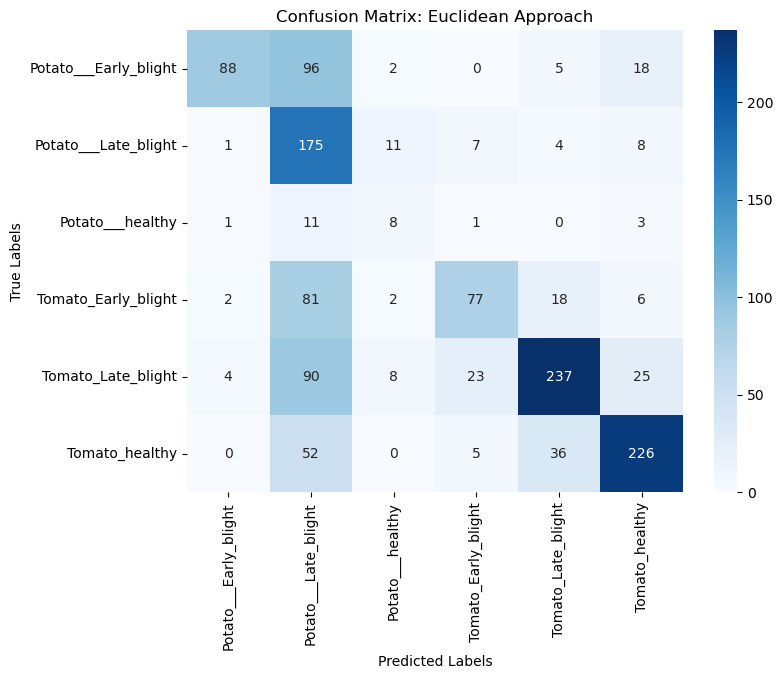

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix: Euclidean Approach')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [63]:
cm2 = confusion_matrix(y_test, y_pred2)

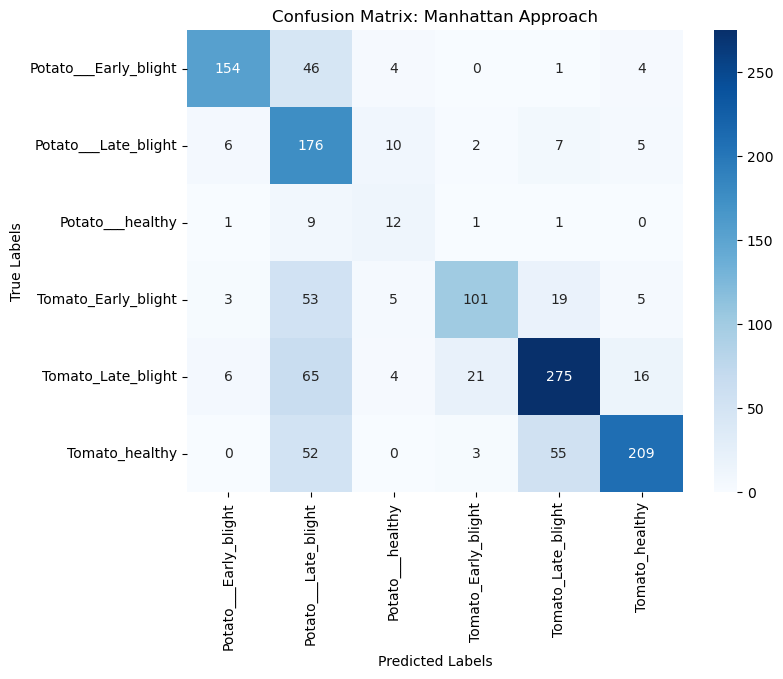

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix: Manhattan Approach')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()